## scikit-learnによる分類手法

分類問題に対する機械学習の手法としては、パーセプトロン以外にも様々なものがあり、scikit-learnに実装されている。

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

ここではirisデータとあやめの花の分類問題を通して、いくつかの手法を簡単に紹介する。

扱う手法は以下の通り
- パーセプトロン
- ロジスティック回帰
- SVM
- 決定木
- kNN

まずは各手法の違いを理解するために、簡単なデータセットについて様子をみてみよう。

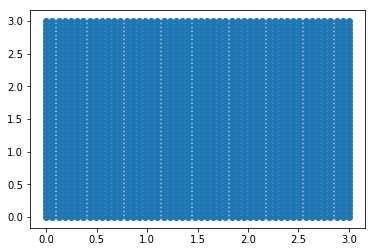

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#決定領域の図示
d=50
xx, yy=np.meshgrid(np.linspace(0,3,d),np.linspace(0,3,d))
plt.scatter(xx,yy)
plt.show()
grid=np.array([xx.ravel(),yy.ravel()]).T

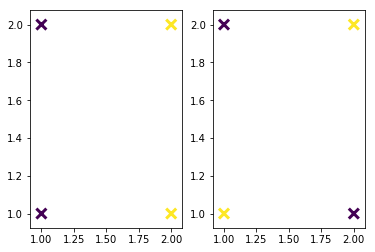

In [2]:
#簡単な具体例、線形分離可能なものと不可能なもの
X_sample, y_sample=np.array([[1,1],[2,2],[1,2],[2,1]]),np.array([0,1,0,1])
X_sample2, y_sample2=np.array([[1,1],[2,2],[1,2],[2,1]]),np.array([1,1,0,0])

fig,ax=plt.subplots(1,2)
ax[0].scatter(X_sample[:,0],X_sample[:,1], c=y_sample, s=100, marker='x',linewidth=3)
ax[1].scatter(X_sample2[:,0],X_sample2[:,1], c=y_sample2, s=100, marker='x',linewidth=3)

### パーセプトロン

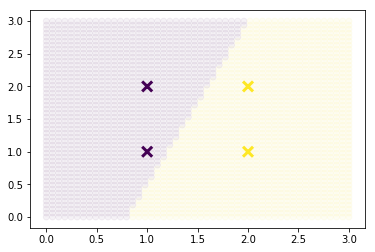

In [3]:
from sklearn.linear_model import Perceptron
clf=Perceptron(n_iter=20)
clf.fit(X_sample,y_sample)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=100,linewidth=3)

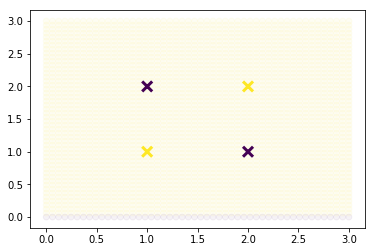

In [4]:
clf=Perceptron(n_iter=20)
clf.fit(X_sample2,y_sample2)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample2[:,0],X_sample2[:,1],marker='x',c=y_sample2,s=100,linewidth=3)

### ロジスティック回帰

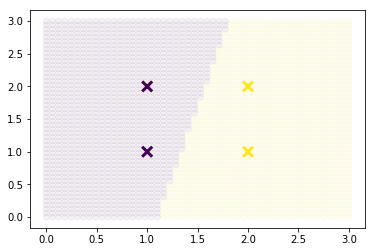

In [5]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=100)
clf.fit(X_sample,y_sample)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=100,linewidth=3)

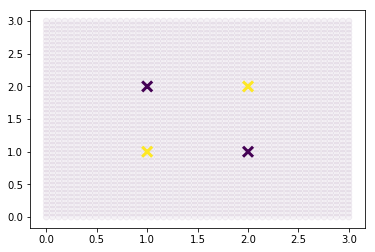

In [6]:
clf=LogisticRegression(C=1)
clf.fit(X_sample2,y_sample2)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample2[:,0],X_sample2[:,1],marker='x',c=y_sample2,s=100,linewidth=3)

### サポートベクターマシン(SVM)

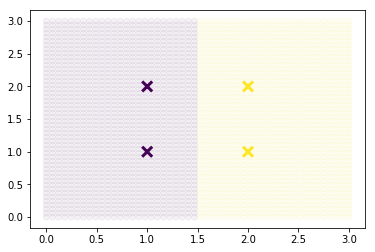

In [7]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_sample,y_sample)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=100,linewidth=3)

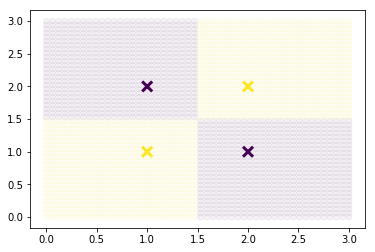

In [8]:
clf=SVC(kernel='rbf')
clf.fit(X_sample2,y_sample2)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample2[:,0],X_sample2[:,1],marker='x',c=y_sample2,s=100,linewidth=3)

### 決定木

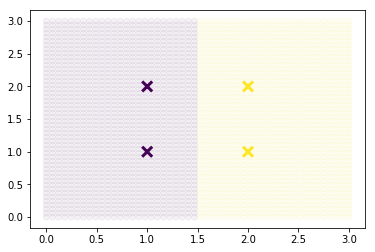

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_sample,y_sample)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=100,linewidth=3)

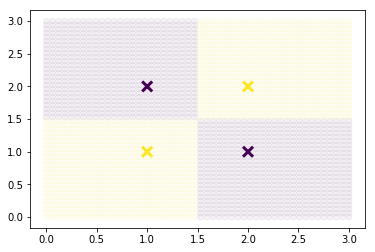

In [10]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_sample2,y_sample2)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample2[:,0],X_sample2[:,1],marker='x',c=y_sample2,s=100,linewidth=3)

### kNN

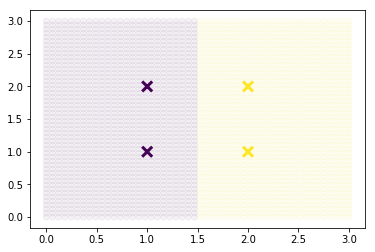

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
clf.fit(X_sample,y_sample)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=100,linewidth=3)

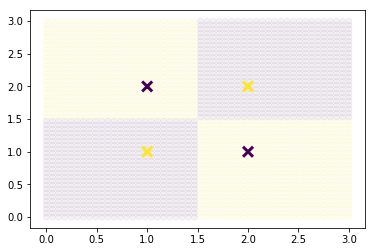

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
clf.fit(X_sample2,y_sample2)
Z=clf.predict(grid).reshape(xx.shape)
plt.scatter(xx,yy,c=Z,alpha=0.05)
plt.scatter(X_sample2[:,0],X_sample2[:,1],marker='x',c=y_sample2,s=100,linewidth=3)

色々なサンプルで各分類器の性能の差を可視化してみよう

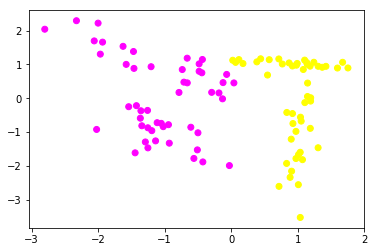

In [13]:
from sklearn import datasets
X,y=datasets.make_classification(n_features=2,n_redundant=0)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.spring)

## irisデータの分析
まずは今回扱うデータについて、その様子を調べてみよう。
機械学習を用いる際には、あらかじめデータの様子について把握しておくことが重要である。

In [14]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

今回扱うデータはあやめの花の種類を、その花の大きさから分類するものである。
setosa, versicolor, virginicaという三種類の花のいずれかに分類する。
変数としては、花弁の長さと幅、ガクの長さと幅の4変数がある。

In [15]:
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
X = iris_dataset.data
y = iris_dataset.target

In [17]:
print(X[0:5,:])
print(y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


サンプル数は150で、3種類の花がそれぞれ50サンプルずつある。

In [18]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


変数間の関係を可視化してみる

In [19]:
import pandas as pd
iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a8adc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11aec6400>]], dtype=object)

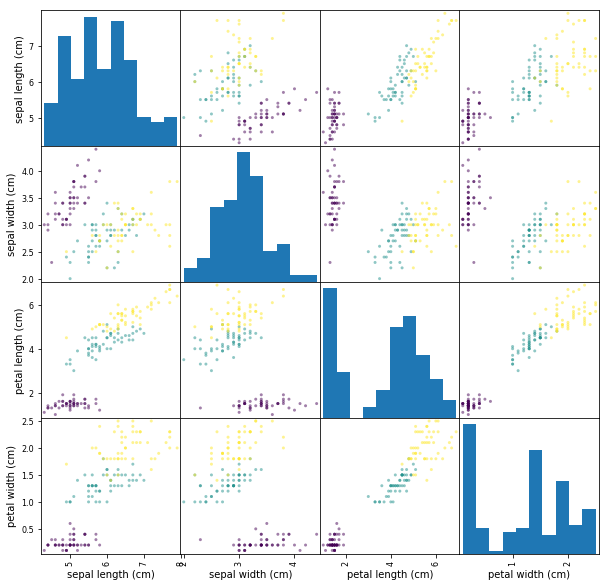

In [20]:
pd.plotting.scatter_matrix(iris_dataframe, c=y, figsize=(10,10))

## パーセプトロン

パーセプトロンについては前回説明したように、誤差関数
$$
E(w)=\sum_iy_i(x_iw_i)
$$
を最小化する。

ハイパーパラメータは
- 学習率`eta0`
- 反復回数`n_iter`

などがある。

In [21]:
from sklearn.linear_model import Perceptron

clf = Perceptron(eta0=0.5, n_iter=20)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.5, fit_intercept=True,
      n_iter=20, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [22]:
clf.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
clf.score(X,y)

0.73999999999999999

In [24]:
import numpy as np
X_new = np.array([[5.0,3.0,1.0,0.2],[4.7,2.5,1.3,0.3]])
clf.predict(X_new)

array([1, 1])

## 決定木

データの「不純度」を下げる分類基準を決める。
不純度の基準は、エントロピーなどいくつかの種類がある。

エントロピーは$n$クラス分類では$S=-\sum_{i=1}^np_i\log p_i$で計算できる。
ただし$p_i=0$なる$i$については和を取らない。
例えば全てが一つのクラスであれば$S=1$となり、$n$クラスが均等になっている場合が最大である。

- 結果の解釈がしやすい。
- 説明変数が質的、量的どちらでも。標準化も不要。
- 過学習しやすい。子ノードのデータ数、木の深さで対策。
- 訓練データにより結果が大きく変わる。

ハイパーパラメータは
- 木の深さmax_depth

など

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
clf.score(X,y)

1.0

## ロジスティック回帰

クラス1に属する確率を
$$
p=\phi(x)=\frac{1}{1+\exp(-(w_0+w_1x_1+\cdots+w_mx_m))}
$$
として、これを予測する。

誤差関数を負の対数尤度関数
$$
l(w)=-\log(\prod^n_{i=1}\phi(x^{(i)})^{y^{(i)}}(1-\phi(x^{(i)}))^{1-y^{(i)}})
$$
として、これを最小化する$w$を求める。

正則化する場合は
$Cl(w)+\frac{1}{2}\vert w\vert^2$
を最小化する。

ハイパーパラメータは
- 正則化の強さC

など

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
clf.score(X,y)

0.95999999999999996

In [29]:
clf.predict(X)
#clf.predict_proba(X)で各クラスの確率も計算できる。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## SVM

マージンを最大にする直線を決める。
カーネルトリックを使うことで、非線形な分類もできる。
カーネルの種類は
- linear
- rbf
- polynomial
- sigmoid
がある。

ハイパーパラメータは
- gammaはカーネル係数。非線形の強さ
- Cは正則化

In [30]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
clf.score(X,y)

0.98666666666666669

## kNN

他の手法と違い、誤差関数を学習しない。
新しいデータを判別するときに、近くにあるデータから多数決で決める。

ハイパーパラメータは
- `n_neighbor`はいくつのデータをみて判断するか
- `p, metric`は距離の決め方。

学習コストはないが、判別に時間がかかる。

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
import numpy as np
X_new = np.array([[5.0,3.0,1.0,0.2],[4.7,2.5,1.3,0.3]])
clf.predict(X_new)

array([0, 0])

In [35]:
clf.score(X,y)

0.95999999999999996